In [1]:

bulk = pd.read_csv("Lyon_bulk_raw.csv", index_col = 0)
alithea = pd.read_csv("Lyon_alithea_raw.csv", index_col = 0)
bulk.shape
alithea.shape

(118, 12200)

In [11]:
import pandas as pd

# Load the dataset
X = pd.read_csv(f"full_raw_matrix_and_meta.csv", index_col=0)
X.columns = X.columns.str.replace('_ ', ' ')

In [13]:
import matplotlib.pyplot as plt

# Downsample to DMSO
X = X[X["Metadata Treatments"] == "DMSO"]

# Separate metadata columns
meta = X.loc[:, X.columns.str.startswith('Metadata')]
if "Metadata Timepoints" in meta.columns:
    meta["Metadata Treatments"] = meta["Metadata Treatments"] + " at " + meta["Metadata Timepoints"].astype(str) + "h"

# Keep only the non-metadata columns
X = X.loc[:, ~X.columns.str.startswith('Metadata')]

# Fill missing values with the median of each column
X = X.fillna(0).astype(int)

# Create a plot to visualize the gene number at read cutoff
plt.figure(figsize=(10, 10))

# Define a read count cutoff
read_count_cutoffs = [1, 10, 50, 100, 200, 500]  # Example cutoff values 


<Figure size 1000x1000 with 0 Axes>

In [15]:
X["DMSO replicate"] = list(range(X.shape[0]))

In [16]:
X

,LOC118273292,LOC126911541,LOC126911537,LOC118273263,LOC118273262,LOC118273265,LOC118273264,LOC118273712,LOC118273291,LOC126910974,...,AOB78_gt19,AOB78_gp03,AOB78_gp02,AOB78_gt20,AOB78_gp01,AOB78_gt21,AOB78_gr02,AOB78_gt22,AOB78_gr01,DMSO replicate
AAGGACCACCGGAA_1,0,1,0,0,0,0,0,1,0,0,...,0,1,14,0,0,0,0,0,5,0
ATGTCTAGTATAGC_1,0,1,0,0,0,0,0,0,0,0,...,0,1,4,0,0,0,0,0,0,1
CACGAGCGATCTAG_1,2,3,0,0,0,0,0,0,0,0,...,0,9,33,0,0,0,0,0,7,2
CAGACGATCTGCGA_1,0,0,0,0,0,0,0,0,0,0,...,0,1,7,0,1,0,0,0,0,3
CAGAGCATCATGAC_1,0,0,0,0,0,0,0,0,0,0,...,0,1,10,0,0,0,0,0,2,4
CCTTAACACGGAGA_1,1,5,0,0,0,0,0,0,0,0,...,0,14,79,0,5,0,0,0,24,5


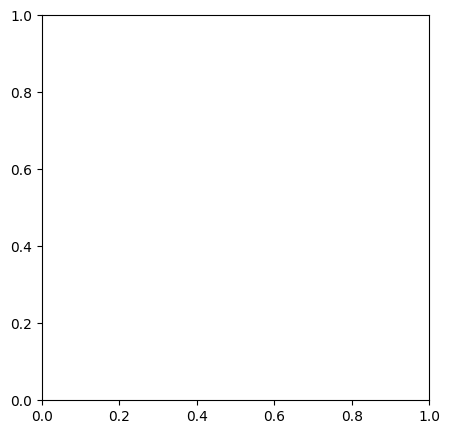

In [38]:

genes = []
cutoffs = []
datatypes = []   
X.index = range(X.shape[0])

# Define a read count cutoff
read_count_cutoffs = [10, 50, 100, 200, 500]  # Example cutoff values 

for i, row in X.iterrows():
    # Calculate the total read counts per gene for each dataframe
    
    # Count the number of genes that meet the cutoff for each dataframe
    gene_counts_at_cutoffs = [sum(row >= cutoff) for cutoff in read_count_cutoffs]

    # Plot the gene number at read cutoff for each dataframe
    genes += gene_counts_at_cutoffs
    datatypes += [f"DMSO Replicate {i + 1}"]*len(read_count_cutoffs)
    cutoffs += read_count_cutoffs

plt.figure(figsize = (5,5))
ax = plt.gca()
plot_df = pd.DataFrame({
    "Genes covered at Read Cutoff": genes,
    "Read cut-off" : cutoffs,
    "Sample" : datatypes    
})



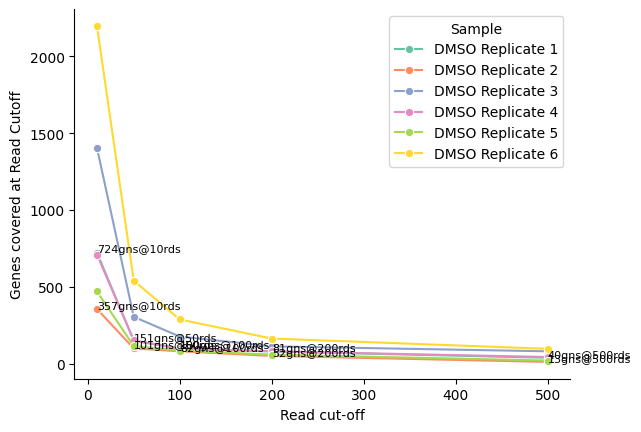

In [40]:
import seaborn as sns

ax = plt.gca()
ax = sns.lineplot(
    data=plot_df,
    x="Read cut-off",
    y="Genes covered at Read Cutoff",
    hue ="Sample",
    marker="o",
    palette="Set2",
    ax = ax
)

for j, line in enumerate(ax.lines):
    xdata = line.get_xdata()
    ydata = line.get_ydata()
    for i in range(len(xdata)):
        ax.text(xdata[i], ydata[i], f'{int(ydata[i])}gns@{int(xdata[i])}rds', color='black', fontsize=8, ha='left')
    if j==1:
        break
ax.spines[['right', 'top']].set_visible(False)
plt.show()


/tmp/ipykernel_109754/195500702.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=values, y=labels, palette = "rainbow")


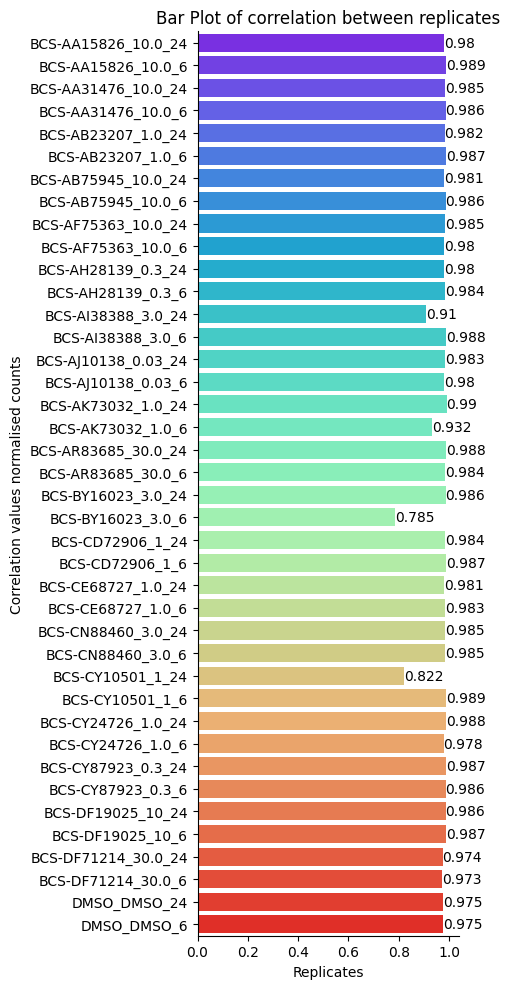

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Alithea_Lyon_normalised_deseq.csv", index_col = 0)

# Assuming alithea is your normalized count table

# Select the columns of interest including the metadata columns and the normalized counts
metadata_cols = ['Metadata_treatments', 'Metadata_concentration', 'Metadata_Timepoints']
gene_cols = [col for col in df.columns if not col.startswith("Metadata")]
selected_cols = metadata_cols + gene_cols

df["Replicate_col"] = df['Metadata_treatments'] + "_" + df["Metadata_concentration"].astype(str) + "_" +df["Metadata_Timepoints"].astype(str)
# Filter the data based on the selected columns

heatmap_dict = {}
for replicate in df["Replicate_col"].unique():
    table = df.loc[df["Replicate_col"] == replicate, gene_cols]
    correlation_matrix = table.T.corr(method='pearson')
    # Identify the diagonal elements
    np.fill_diagonal(correlation_matrix.values, np.nan)
    # Set the diagonal elements to NA    # Calculate the average correlation
    average_column_correlation = correlation_matrix.mean().mean()
    # Print the average correlation
    heatmap_dict[replicate] = round(average_column_correlation,3)

# Extract keys and values from the dictionary
labels = heatmap_dict.keys()
values = heatmap_dict.values()

labels, values = zip(*sorted(list(zip(labels, values)), key = lambda x:x[0]))
# Create a bar plot
#plt.hbar(values, labels)

# Add labels and title
fig = plt.figure(figsize=(5,10))

ax = sns.barplot(x=values, y=labels, palette = "rainbow")
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.xlabel('Replicates')
plt.ylabel('Correlation values normalised counts')
plt.title('Bar Plot of correlation between replicates')
plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("./plots/replicates_correlation.png")
# Show the plot
plt.show()

In [5]:
import scipy
#sns.clustermap(df[gene_cols].corr(), row_colors=df[["Metadata_treatments", "Metadata_Timepoints"]])
#sns.clustermap(df[gene_cols].corr())
#plt.show()

In [2]:
import pandas as pd

df = pd.read_csv("Lyon_alithea_raw.csv", index_col = 0)
print(df)
df = df.sort_values(by = "Metadata_Plate")
#df = df[df["Metadata_Plate"] != 3]
df

    Metadata_treatments  Metadata_Plate Metadata_Wells  Metadata_Timepoints  \
0           BCS-DF71214               1           A1_1                    6   
1           BCS-AI38388               1           B1_1                    6   
2           BCS-CY87923               1           C1_1                    6   
3           BCS-AR83685               1           D1_1                    6   
4           BCS-AF75363               1           E1_1                    6   
..                  ...             ...            ...                  ...   
113                DMSO               2           D3_2                   24   
114         BCS-DF19025               2           E3_2                   24   
115         BCS-CY10501               2           F3_2                   24   
116         BCS-CD72906               2           G3_2                   24   
117                DMSO               2           H3_2                   24   

    Metadata_concentration  Metadata_sampleID  Bcin

,Metadata_treatments,Metadata_Plate,Metadata_Wells,Metadata_Timepoints,Metadata_concentration,Metadata_sampleID,Bcin01g00010,Bcin01g00020,Bcin01g00030,Bcin01g00040,...,ENSRNA049538627,ENSRNA049538670,ENSRNA049538680,ENSRNA049538743,ENSRNA049538770,ENSRNA049538809,ENSRNA049538829,ENSRNA049538880,nbis-gene-1,nbis-gene-2
0,BCS-DF71214,1,A1_1,6,30.0,t6h_BCS-001_rep1,26,13,46,35,...,0,0,0,0,0,0,0,0,0,0
69,BCS-CN88460,1,F9_1,24,3.0,t24h_BCS-006_rep1,5,7,19,2,...,0,0,0,0,0,0,0,0,0,0
68,BCS-AF75363,1,E9_1,24,10.0,t24h_BCS-005_rep1,7,4,16,4,...,0,0,0,0,0,0,0,0,0,0
67,BCS-AR83685,1,D9_1,24,30.0,t24h_BCS-004_rep1,18,10,38,12,...,0,0,0,0,0,0,0,0,0,0
66,BCS-CY87923,1,C9_1,24,0.3,t24h_BCS-003_rep1,36,18,119,49,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,BCS-AK73032,2,C1_2,24,1.0,t24h_BCS-011_rep2,20,13,73,26,...,0,0,0,0,0,0,0,0,0,0
95,BCS-AA15826,2,B1_2,24,10.0,t24h_BCS-010_rep2,4,3,21,7,...,0,0,0,0,0,0,0,0,0,0
116,BCS-CD72906,2,G3_2,24,1,t24h_BCS-019_rep2,46,8,106,31,...,0,0,0,0,0,0,0,0,0,0
104,BCS-AK73032,2,C2_2,24,1.0,t24h_BCS-011_rep3,20,7,50,13,...,0,0,0,0,0,0,0,0,0,0


/tmp/ipykernel_109754/3201196720.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'BulkRNA': bulk.sum(axis=1),
/tmp/ipykernel_109754/3201196720.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  'Alithea': alithea.sum(axis=1),
/tmp/ipykernel_109754/3201196720.py:43: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_bulk = bulk.sum(axis=1).median()
/tmp/ipykernel_109754/3201196720.py:45: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None'

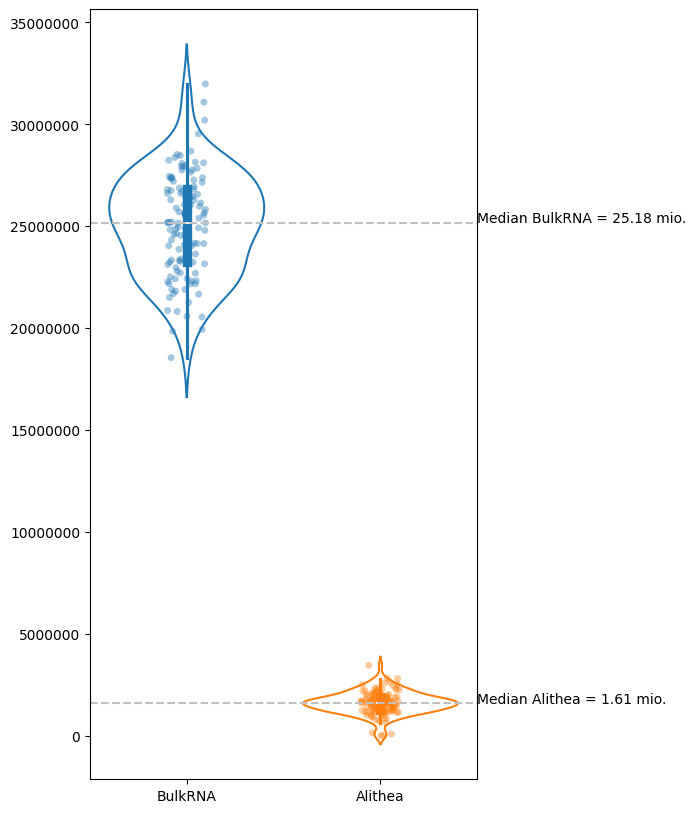

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming bulk and alithea are your series
data = pd.DataFrame({
    'BulkRNA': bulk.sum(axis=1),
    'Alithea': alithea.sum(axis=1),
    #"Treatments": alithea["Metadata_treatments"]
})


# Reshape the data into long-form using pd.melt
#melted_data = data.melt(id_vars="Treatments", value_vars=['BulkRNA', 'Alithea'], var_name="Source")

#print(melted_data)
# Create a strip plot with melted data
fig = plt.figure(figsize=(5,10))
ax = sns.stripplot(
    data=data,
    #x="Source",
    #y="value",
    #dodge=True,
    jitter=True,
    #hue='Treatments',
    alpha=0.4,
    zorder=0
)

# Use the DataFrame to create a violin plot
sns.violinplot(
    data=data,
    #x="Source",
    #y="value",
    fill = False,
    #hue="Treatments",
    #split=True,
    #inner="point",
    ax=ax,
    zorder=1
)

median_bulk = bulk.sum(axis=1).median()
bulk_mio = round(median_bulk/1000000, 2)
median_alithea = alithea.sum(axis=1).median()
alithea_mio = round(median_alithea/1000000, 2)

ax.axhline(median_alithea, ls = "--", c = "silver")
ax.text(1.5, median_alithea, f"Median Alithea = {alithea_mio} mio.")
ax.axhline(median_bulk, ls = "--", c = "silver")
ax.text(1.5, median_bulk, f"Median BulkRNA = {bulk_mio} mio.")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:d}'.format(int(x))))

# Move the legend outside the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [8]:
def process_df(df):
    #for con in df["Metadata_concentration"]:
    #    consplit = str(con).split(".")
    #    if consplit[1] == "0" or  consplit[1] == "00":
    #        new_meta.append( consplit[0])
    #    else:
    #        new_meta.append( ".".join(consplit))
    #df["Metadata_concentration"] = new_meta
    df.loc[df["Metadata_treatments"] == "DMSO", "Metadata_concentration"] = 0
    df["Metadata_concentration"] = df["Metadata_concentration"].astype(float)
    df["Treat_and_conc"] =  df["Metadata_treatments"] + ": " + df["Metadata_concentration"].astype(str)
    return(df)

In [9]:
bulk = process_df(bulk)
alithea = process_df(alithea)

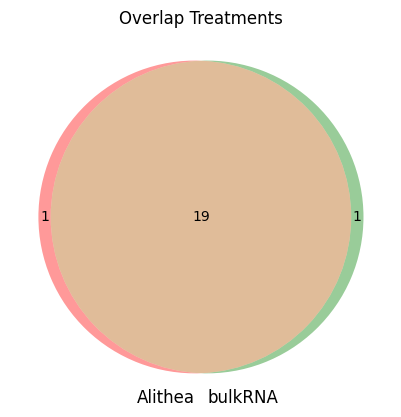

In [10]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
# Create a Venn diagram to show the overlap
venn2(subsets=(
    set( alithea["Metadata_treatments"]), 
    set( bulk["Metadata_treatments"])), 
    set_labels=('Alithea', 'bulkRNA'))

# Show the plot
plt.title(f'Overlap Treatments')
plt.savefig(f"./plots/overlap_treatments.png")

In [11]:
alithea["Treat_and_conc"].unique()

array(['BCS-DF71214: 30.0', 'BCS-AI38388: 3.0', 'BCS-CY87923: 0.3',
       'BCS-AR83685: 30.0', 'BCS-AF75363: 10.0', 'BCS-CN88460: 3.0',
       'BCS-AJ10138: 0.03', 'BCS-CY24726: 1.0', 'BCS-AH28139: 0.3',
       'BCS-AA15826: 10.0', 'BCS-AK73032: 1.0', 'BCS-AA31476: 10.0',
       'BCS-AB23207: 1.0', 'BCS-CE68727: 1.0', 'BCS-AB75945: 10.0',
       'BCS-BY16023: 3.0', 'BCS-DF19025: 10.0', 'BCS-CY10501: 1.0',
       'BCS-CD72906: 1.0', 'DMSO: 0.0'], dtype=object)

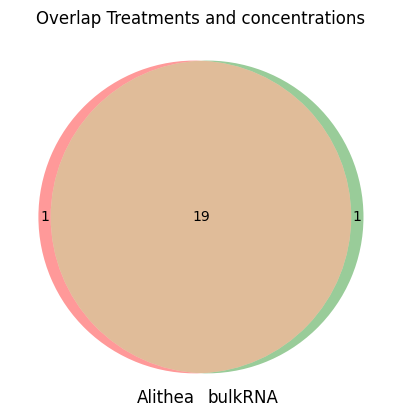

In [12]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt
# Create a Venn diagram to show the overlap
venn2(subsets=(
    set( alithea["Treat_and_conc"]), 
    set( bulk["Treat_and_conc"])), 
    set_labels=('Alithea', 'bulkRNA'))

# Show the plot
plt.title(f'Overlap Treatments and concentrations')
plt.savefig(f"./plots/overlap_treatments_and_conc.png")

In [13]:
overlap = set( alithea["Treat_and_conc"]).intersection(set( bulk["Treat_and_conc"]))
print(len(overlap))

19


In [14]:
with open("common_treat_and_conc.txt", "w+") as inf:
    inf.write("\n".join(list(overlap)))

In [15]:
bulk = bulk[bulk["Treat_and_conc"].isin(overlap)]
alithea = alithea[alithea["Treat_and_conc"].isin(overlap)]

In [7]:

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def reads_covered(read_counts_dfs, titles):
    
    # Create a plot to visualize the gene number at read cutoff
    plt.figure(figsize=(10, 10))

    # Define a read count cutoff
    read_count_cutoffs = np.linspace(1, 500, 10)  # Example cutoff values 
    read_count_cutoffs = [10, 50, 100, 200, 500]  # Example cutoff values 

    genes = []
    cutoffs = []
    datatypes = []   
    for i, read_counts_df in enumerate(read_counts_dfs):
        # Calculate the total read counts per gene for each dataframe
        total_read_counts_per_gene = read_counts_df.median(axis=0)
        
        # Count the number of genes that meet the cutoff for each dataframe
        gene_counts_at_cutoffs = [sum(total_read_counts_per_gene >= cutoff) for cutoff in read_count_cutoffs]

        # Plot the gene number at read cutoff for each dataframe
        cutoffs += read_count_cutoffs
        genes += gene_counts_at_cutoffs
        datatypes += [titles[i]] * len(read_count_cutoffs)
    plt.figure(figsize = (5,5))
    ax = plt.gca()
    plot_df = pd.DataFrame({
        "Genes covered at Read Cutoff": genes,
        "Read cut-off" : cutoffs,
        "Experiment" : datatypes    
    })
    
    ax = sns.lineplot(
        data=plot_df,
        x="Read cut-off",
        y="Genes covered at Read Cutoff",
        hue="Experiment",
        marker="o",
        palette="Set2",
        ax = ax
    )
    
    for j, line in enumerate(ax.lines):
        xdata = line.get_xdata()
        ydata = line.get_ydata()
        for i in range(len(xdata)):
            ax.text(xdata[i], ydata[i], f'{int(ydata[i])}gns@{int(xdata[i])}rds', color='black', fontsize=8, ha='left')
        if j==1:
            break
    ax.spines[['right', 'top']].set_visible(False)

    plt.savefig("./plots/read_decay.png")
    plt.show()

/tmp/ipykernel_15837/377472002.py:25: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_read_counts_per_gene = read_counts_df.median(axis=0)
/tmp/ipykernel_15837/377472002.py:25: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_read_counts_per_gene = read_counts_df.median(axis=0)
/tmp/ipykernel_15837/377472002.py:25: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid 

<Figure size 1000x1000 with 0 Axes>

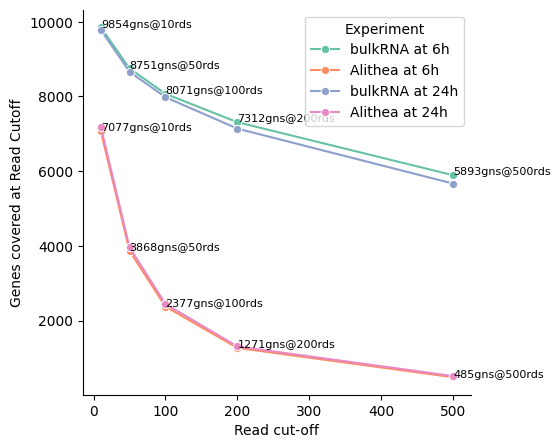

In [8]:
reads_covered([
    bulk[bulk["Metadata_Timepoints"] == 6], 
    alithea[alithea["Metadata_Timepoints"] == 6],
    bulk[bulk["Metadata_Timepoints"] == 24], 
    alithea[alithea["Metadata_Timepoints"] == 24],
    ],[
        "bulkRNA at 6h",
        "Alithea at 6h",
        "bulkRNA at 24h",
        "Alithea at 24h",
    ]
)

In [18]:
alithea.drop(columns = "Treat_and_conc", inplace = True)
bulk.drop(columns = "Treat_and_conc", inplace = True)

In [19]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def comparison(df1, df2, reads_X):
    # Assuming df1 and df2 are your dataframes containing count tables
    # You can calculate the genes covered in X reads for each dataframe
    cols1 = [col for col in df1.columns if not col.startswith("Metadata")]
    cols2 = [col for col in df2.columns if not col.startswith("Metadata")]

    df1 = df1[cols1]
    df2 = df2[cols2]
    # Example: Calculate genes covered in X reads for df1 and df2
    genes_covered_df1 = df1.columns[(df1.median(axis=0) >= reads_X)]
    genes_covered_df2 = df2.columns[(df2.median(axis=0) >= reads_X)]

    # Create a Venn diagram to show the overlap
    venn2(subsets=(set(genes_covered_df1), set(genes_covered_df2)), set_labels=('Alithea', 'bulkRNA'))

    # Show the plot
    plt.title(f'Overlap of Genes Covered in {reads_X} Reads')
    plt.savefig(f"./plots/overlap_genes_cutoff_{reads_X}.png")
    plt.show()

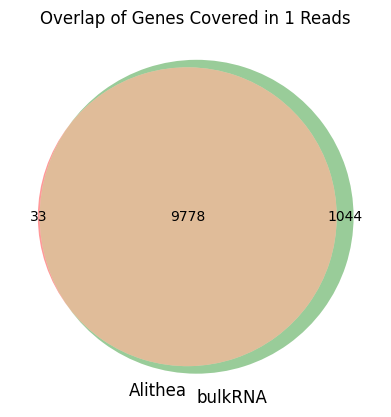

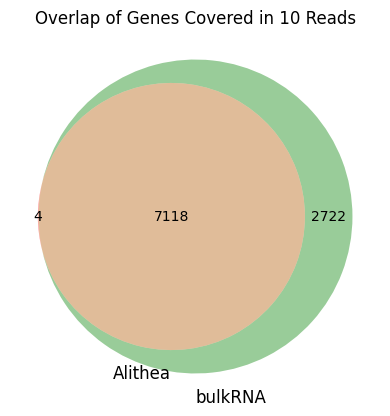

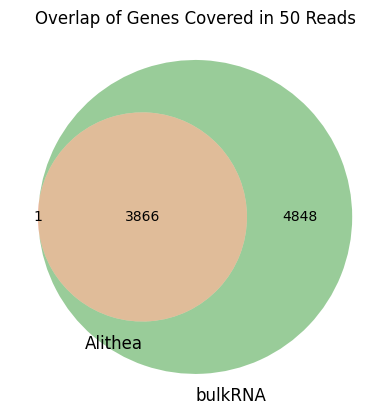

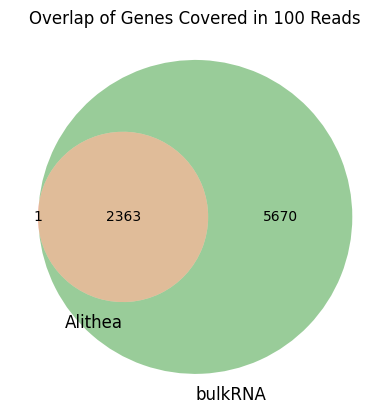

In [20]:
comparison(alithea, bulk, 1)
comparison(alithea, bulk, 10)
comparison(alithea, bulk, 50)
comparison(alithea, bulk, 100)